<a href="https://colab.research.google.com/github/c-susan/sqlite_database_operations/blob/main/sqlite_database_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Packages

In [59]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# **1. Data Exploration and Analysis**
Basic exploratory data analysis using Python

### Loading Datasets

Loaded 2 datasets on pricing transparency of two hospital, St. Charles Hospital and Stony Brook University Hospital.



> **Dataset from St. Charles Hospital**









In [6]:
df_stcharles = pd.read_csv('https://raw.githubusercontent.com/c-susan/sqlite_database_operations/main/datasets/st.-charles-hospital_standardcharges.csv')

In [7]:
# Checking the size / number of rows and columns in the data
df_stcharles.shape

(65050, 10)

In [8]:
# Previewing the dataset
df_stcharles.sample(5)

,Billing/Charge Code,Charge Description,Rev Code,CPT/HCPC,Price,NDC,Package Size,Package Unit,Package Description,Charge Quantity
45727,2780187600,ORMS&D STENT XACT TAP 8-6MMX30MM,278,C1876,10062.5,NaN,NaN,NaN,NaN,NaN
62732,6370000002,XRX PYRAZINAMIDE 500 MG PO TABS,250,NaN,1643.0,67253-660-10,100.0,each,Bottle,100 each
56409,6370000002,XRX ENEMA 7-19 GM/118ML RE ENEM,250,NaN,13.0,53329-014-11,133.0,mL,Bottle,133 mL
43384,2780177600,ORMS&D SH RESURFACING HEAD 38,278,C1776,20125.0,NaN,NaN,NaN,NaN,NaN
20189,2780000060,ORMS&D COIL SMART WAVE EX SOFT 3X6,278,C1889,6727.5,NaN,NaN,NaN,NaN,NaN



> **Dataset from Stony Brook University Hospital**



In [9]:
df_stonybrook = pd.read_csv('https://raw.githubusercontent.com/c-susan/sqlite_database_operations/main/datasets/StonyBrookUniversityHospital_standardcharges.csv')

In [10]:
# Checking the size / number of rows and columns in the data
df_stonybrook.shape

(7710, 57)

In [11]:
# Previewing the dataset
df_stonybrook.sample(5)

,Code,Description,Type,Package/Line_Level,Gross charge,Discounted cash price,De-identified min contracted rate,De-identified max contracted rate,Derived contracted rate,1199-Commercial other,...,Optum-Commercial other,Oxford-Commercial other,Oxford-Commercial HMO/POS,Tricare-Commercial other,United Healthcare-Commercial other,United Healthcare-Medicare Advantage HMO,United Healthcare-Commercial HMO/POS,United Healthcare-Medicaid HMO,United Healthcare-Commercial PPO/Open Access,Veteran Family-Commercial other
1715,36584,REPLACEMENT OF PERIPHERALLY INSERTED CENTRAL V...,Outpatient,Line,3701.26,3701.26,1615.39,5719.67,3464.35,NaN,...,NaN,NaN,NaN,NaN,5127.00,1615.39,NaN,NaN,NaN,NaN
7645,31702004,R&B REV PED 11N1 PT-P,NaN,NaN,8965.00,8965.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2692,55874,INJECTION OF BIODEGRADABLE MATERIAL NEXT TO PR...,Outpatient,Line,11117.69,11117.69,5068.23,8774.00,6860.32,NaN,...,5068.23,NaN,NaN,NaN,8186.25,5068.23,NaN,NaN,NaN,NaN
698,25020,INCISION OF TISSUE OF FOREARM AND/OR WRIST MUS...,Outpatient,Package,4338.40,4338.40,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,15002,"PREPARATION OF SKIN GRAFT SITE OF TRUNK, ARMS,...",Outpatient,Package,2853.28,2853.28,1158.57,4822.00,2453.17,4822.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning Column Names



> **St. Charles Hospital**



In [12]:
# Remove leading and trailing white space from a column
df_stcharles.columns = df_stcharles.columns.str.strip()

# Function to remove white space and special characters from a value
def clean_column_names(df):
    # Define a helper function to clean column names
    def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '_', name)
        return cleaned_name.lower()

    # Rename columns using the helper function
    # This is using a list comprehend - e.g., we have a list to the right of the equals sign,
    # and inside the list, we are applying our function, for every col (or X) that exists in df.columns
    df_stcharles.columns = [clean_name(col) for col in df_stcharles.columns]
    return df_stcharles

# Apply the clean_value function to all columns
df_stcharles = clean_column_names(df_stcharles)

In [13]:
df_stcharles.sample(5)

,billing_charge_code,charge_description,rev_code,cpt_hcpc,price,ndc,package_size,package_unit,package_description,charge_quantity
29357,2780000051,ORMS&D INTERMAXX CORT SPAC 12X12 5MM,278,C1889,4312.5,NaN,NaN,NaN,NaN,NaN
51394,2780171301,ORMS&D XIA 3 UNIPLANAR SCREW 7.5X30,278,C1713,4064.1,NaN,NaN,NaN,NaN,NaN
55820,6370000002,XRX DICLOFENAC SODIUM 25 MG PO TBEC,250,NaN,818.0,16571-203-10,100.0,each,Bottle,100 each
34165,2780171300,ORMS&D NAIL TIBIAL CANNULATED 270MM,278,C1713,9299.3,NaN,NaN,NaN,NaN,NaN
8542,2791769271,HC SS WIRE-AMPLATZER GUIDEWIRE .035X260-C1769-246,279,C1769,246.0,NaN,NaN,NaN,NaN,NaN


> **Stony Brook University Hospital**

In [14]:
# Remove leading and trailing white space from a column
df_stonybrook.columns = df_stonybrook.columns.str.strip()

# Function to remove white space and special characters from a value
def clean_column_names(df):
    # Define a helper function to clean column names
    def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '_', name)
        return cleaned_name.lower()

    # Rename columns using the helper function
    # This is using a list comprehend - e.g., we have a list to the right of the equals sign,
    # and inside the list, we are applying our function, for every col (or X) that exists in df.columns
    df_stonybrook.columns = [clean_name(col) for col in df_stonybrook.columns]
    return df_stonybrook

# Apply the clean_value function to all columns
df_stonybrook = clean_column_names(df_stonybrook)

In [15]:
df_stonybrook.sample(5)

,code,description,type,package_line_level,gross_charge,discounted_cash_price,de_identified_min_contracted_rate,de_identified_max_contracted_rate,derived_contracted_rate,1199_commercial_other,...,optum_commercial_other,oxford_commercial_other,oxford_commercial_hmo_pos,tricare_commercial_other,united_healthcare_commercial_other,united_healthcare_medicare_advantage_hmo,united_healthcare_commercial_hmo_pos,united_healthcare_medicaid_hmo,united_healthcare_commercial_ppo_open_access,veteran_family_commercial_other
7576,30324008,R&B REV EMER 04PT PT-I,NaN,NaN,13590.00,13590.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2476,51741,ELECTRONIC ASSESSMENT OF BLADDER EMPTYING,Outpatient,Line,414.62,414.62,6.22,281.07,150.30,NaN,...,NaN,281.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,19120,"REMOVAL OF GROWTH AND TISSUE OF BREAST, DUCT, ...",Outpatient,Line,4790.50,4790.50,534.86,7564.00,4231.79,NaN,...,NaN,4704.00,NaN,NaN,5127.00,NaN,NaN,1809.12,NaN,NaN
4342,83735,MAGNESIUM LEVEL,Outpatient,Line,92.66,92.66,4.95,98.00,37.54,57.32,...,6.7,72.68,NaN,NaN,73.10,20.28,92.0,6.70,18.84,NaN
4328,83520,MEASUREMENT OF SUBSTANCE USING IMMUNOASSAY TEC...,Outpatient,Line,130.87,130.87,11.74,640.00,128.72,22.05,...,NaN,78.50,NaN,21.36,30.75,NaN,NaN,11.74,22.93,NaN


### Checking for Null Values in Dataset

In [16]:
df_stcharles.isnull().sum()

billing_charge_code        0
charge_description         0
rev_code                   0
cpt_hcpc               14525
price                     92
ndc                    52338
package_size           52338
package_unit           52338
package_description    52401
charge_quantity        52338
dtype: int64

In [17]:
df_stonybrook.isnull().sum()

code                                               0
description                                        0
type                                             783
package_line_level                               783
gross_charge                                       0
discounted_cash_price                              0
de_identified_min_contracted_rate               1456
de_identified_max_contracted_rate               1456
derived_contracted_rate                         1456
1199_commercial_other                           6696
aetna_medicare_advantage_hmo                    6604
aetna_commercial_hmo_pos                        5883
aetna_commercial_ppo_open_access                6098
aetna_commercial_other                          7582
empire_health_commercial_other                  4650
empire_health_commercial_ppo_open_access        5308
bluecross_blueshield_commercial_other           6456
beacon_health_commercial_other                  7707
carelon_health_commercial_other               

### Data Types and Conversions

In [18]:
# Changed the data type of the "billing_charge_code" and "rev_code" columns from integer to a string.
df_stcharles[['billing_charge_code', 'rev_code']] = df_stcharles[['billing_charge_code', 'rev_code']].astype(str)
df_stcharles.dtypes

billing_charge_code     object
charge_description      object
rev_code                object
cpt_hcpc                object
price                  float64
ndc                     object
package_size           float64
package_unit            object
package_description     object
charge_quantity         object
dtype: object

In [19]:
df_stonybrook.dtypes

code                                             object
description                                      object
type                                             object
package_line_level                               object
gross_charge                                    float64
discounted_cash_price                           float64
de_identified_min_contracted_rate               float64
de_identified_max_contracted_rate               float64
derived_contracted_rate                         float64
1199_commercial_other                           float64
aetna_medicare_advantage_hmo                    float64
aetna_commercial_hmo_pos                        float64
aetna_commercial_ppo_open_access                float64
aetna_commercial_other                          float64
empire_health_commercial_other                  float64
empire_health_commercial_ppo_open_access        float64
bluecross_blueshield_commercial_other           float64
beacon_health_commercial_other                  

## **Basic Data Analysis / Descriptive Statistics**



> **St. Charles Hospital Dataset**



In [20]:
# Basic descriptive statistics
df_stcharles.describe()

,price,package_size
count,64958.000000,12712.000000
mean,5966.981928,99.120812
std,13565.305460,250.988879
min,0.000000,0.025000
25%,431.250000,2.000000
50%,2079.500000,30.000000
75%,5750.000000,100.000000
max,574568.750000,5000.000000


In [45]:
# Frequency counts of each of the unique "rev_codes"
df_stcharles['rev_code'].value_counts()

278    34798
250     8313
279     7751
272     4398
636     4065
       ...  
770        1
803        1
138        1
409        1
929        1
Name: rev_code, Length: 143, dtype: int64

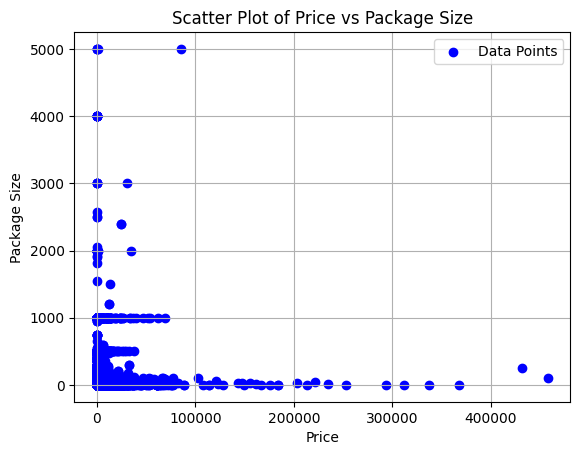

In [57]:
# Scatter Plot of Price vs Package Size
plt.scatter(df_stcharles['price'], df_stcharles['package_size'], label='Data Points', color='blue', marker='o')
plt.title('Scatter Plot of Price vs Package Size')
plt.xlabel('Price')
plt.ylabel('Package Size')
plt.legend()
plt.grid(True)
plt.show()

> **Stony Brook University Hospital Dataset**

In [21]:
df_stonybrook.describe()

,gross_charge,discounted_cash_price,de_identified_min_contracted_rate,de_identified_max_contracted_rate,derived_contracted_rate,1199_commercial_other,aetna_medicare_advantage_hmo,aetna_commercial_hmo_pos,aetna_commercial_ppo_open_access,aetna_commercial_other,...,optum_commercial_other,oxford_commercial_other,oxford_commercial_hmo_pos,tricare_commercial_other,united_healthcare_commercial_other,united_healthcare_medicare_advantage_hmo,united_healthcare_commercial_hmo_pos,united_healthcare_medicaid_hmo,united_healthcare_commercial_ppo_open_access,veteran_family_commercial_other
count,7.710000e+03,7.710000e+03,6254.000000,6.254000e+03,6254.000000,1014.000000,1106.000000,1827.000000,1612.000000,128.000000,...,943.000000,1777.000000,0.0,434.000000,2357.000000,624.000000,133.000000,2065.000000,357.000000,46.000000
mean,2.274832e+04,2.274832e+04,4090.693876,1.003579e+04,6315.587725,5791.542456,5614.005027,4320.418248,4436.188381,1703.756250,...,10868.205705,2572.653849,NaN,2070.212120,5977.464298,4438.776234,3261.594586,2454.314228,789.416667,702.261087
std,7.470570e+04,7.470570e+04,10576.213503,2.915075e+04,14601.846406,24302.352403,12671.487487,8718.537182,8881.733882,5124.232802,...,20703.429246,4036.667401,NaN,8501.228677,16227.981498,9982.579323,10266.478193,11009.140577,2880.486830,1717.006016
min,3.000000e-02,3.000000e-02,0.010000,1.000000e-01,0.030000,0.010000,1.100000,0.020000,0.500000,0.590000,...,2.370000,0.010000,NaN,1.000000,0.010000,1.330000,0.190000,0.010000,0.180000,2.480000
25%,1.065895e+03,1.065895e+03,96.520000,6.982500e+02,403.117500,148.797500,125.070000,277.900000,312.750000,110.387500,...,200.450000,197.880000,NaN,71.220000,258.500000,96.290000,129.000000,42.980000,8.400000,26.810000
50%,4.745295e+03,4.745295e+03,1108.860000,4.311000e+03,2600.740000,974.400000,714.860000,2153.000000,2153.000000,404.500000,...,1700.200000,1932.380000,NaN,236.230000,1571.000000,387.500000,444.000000,425.790000,34.830000,82.710000
75%,1.103881e+04,1.103881e+04,4309.532500,8.170000e+03,5870.540000,4592.000000,5782.430000,4822.000000,4822.000000,1778.920000,...,13359.895000,4704.000000,NaN,1486.947500,5127.000000,3531.920000,2257.430000,1753.100000,286.800000,235.000000
max,1.857952e+06,1.857952e+06,327869.690000,1.302636e+06,370099.900000,331304.280000,157848.600000,99999.990000,96372.570000,54838.130000,...,277267.380000,80891.260000,NaN,154940.610000,291490.750000,92493.910000,88051.340000,327869.690000,26350.000000,7195.400000


In [75]:
# Frequency counts of each of the unique gross charges
df_stonybrook['gross_charge'].value_counts()

8165.00     268
12090.00     70
13590.00     63
8965.00      47
513.00       13
           ... 
6453.95       1
3727.11       1
2284.63       1
18455.69      1
4580.00       1
Name: gross_charge, Length: 5871, dtype: int64

**____________________________________________________________________________________________________________**

# **2. SQLite Database Operations**

**____________________________________________________________________________________________________________**



# **(Optional) Dive Deeper with SQL**